In [ ]:
# Importing Libaries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



In [ ]:
# Impoting Train Data
pwd = os.getcwd()
traindf = pd.read_csv(pwd + "/train.csv")
testdf = pd.read_csv(pwd + "/test.csv")

In [7]:
traindf

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


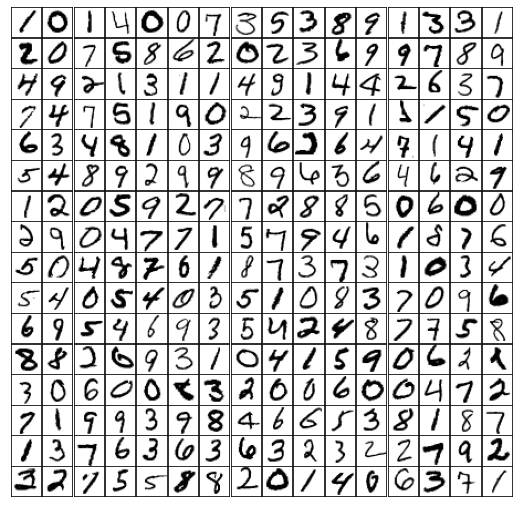

In [8]:
def printfig(preview):  
  fig, axes = plt.subplots(16, 16, figsize= (9, 9),
      subplot_kw = {'xticks':[], 'yticks':[]},
      gridspec_kw = dict(hspace = 0.01, wspace = 0.01))
  for i, ax in enumerate(axes.flat):
      if i < 256:
          ax.imshow(preview.iloc[i].array.reshape((28, 28)),cmap = "gray")

traindfpix = traindf.drop(columns = ['label'])
printfig(255 - traindfpix)

In [9]:
def greytobin(df):
  newdf = (df.copy())
  newdf[newdf <= 25] = 0
  newdf[newdf > 25] = 1
  return newdf

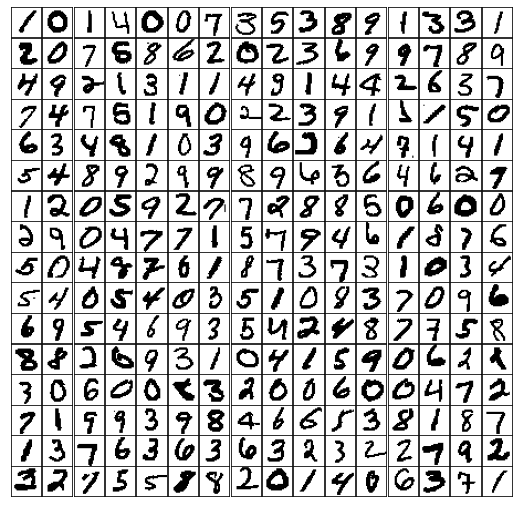

In [10]:
traindfbin = greytobin(traindfpix)
printfig(1 - traindfbin)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [12]:
X = traindfbin.values.tolist()
y = traindf["label"].values.tolist()
X = np.array(X).reshape(-1, 28, 28, 1)
y = np.array(y)

In [13]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.fit(X, y, batch_size = 32, validation_split = 0.1,  epochs = 3)

Epoch 1/3
1182/1182 [==============================] - 53s 44ms/step - loss: 0.1832 - accuracy: 0.9441 - val_loss: 0.0705 - val_accuracy: 0.9786
Epoch 2/3
1182/1182 [==============================] - 51s 44ms/step - loss: 0.0598 - accuracy: 0.9813 - val_loss: 0.0590 - val_accuracy: 0.9795
Epoch 3/3
1182/1182 [==============================] - 51s 43ms/step - loss: 0.0402 - accuracy: 0.9872 - val_loss: 0.0499 - val_accuracy: 0.9829


In [ ]:
greytobin(testdf).values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Xtest = greytobin(testdf).values.tolist()
test = np.array(Xtest).reshape(-1, 28, 28, 1)

In [ ]:
predictions = model.predict([test])

In [ ]:
result = []
for row in predictions:
  result.append(np.argmax(row))

In [ ]:
# Exporting the result
submit = pd.DataFrame({'ImageId' : range(1,len(result)+1), 'Label' : result})
submit.to_csv('result.csv', index = False)

In [ ]:
files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>